In [ ]:
import numpy as np
import PIL.Image
import torch

import dnnlib
import legacy
import pickle
from PIL import Image
import torch.nn as nn
import cv2

from fine_toon_project import run_projection

In [ ]:
input_image_path = "/mnt/disk1/ivymm02/trump2.png"
network = "https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/transfer-learning-source-nets/ffhq-res256-mirror-paper256-noaug.pkl"
outdir = "./outputs"

### 1. Get latent vector of input image

In [26]:
projected_w = run_projection(network, input_image_path, outdir, False, 303, 1000)

Loading networks from "https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/transfer-learning-source-nets/ffhq-res256-mirror-paper256-noaug.pkl"...
Computing W midpoint and stddev using 10000 samples...
step    1/1000: dist 0.63 loss 24562.06
step    2/1000: dist 0.52 loss 27635.33
step    3/1000: dist 0.60 loss 27164.19
step    4/1000: dist 0.60 loss 26250.78
step    5/1000: dist 0.56 loss 24953.43
step    6/1000: dist 0.58 loss 23346.45
step    7/1000: dist 0.56 loss 21504.56
step    8/1000: dist 0.56 loss 19483.95
step    9/1000: dist 0.62 loss 17336.98
step   10/1000: dist 0.51 loss 15133.34
step   11/1000: dist 0.54 loss 12943.48
step   12/1000: dist 0.61 loss 10816.78
step   13/1000: dist 0.51 loss 8798.79
step   14/1000: dist 0.55 loss 6941.08
step   15/1000: dist 0.54 loss 5309.59
step   16/1000: dist 0.58 loss 3968.81
step   17/1000: dist 0.55 loss 2939.71
step   18/1000: dist 0.61 loss 2209.21
step   19/1000: dist 0.57 loss 1756.21
step   20/1000: dist 0.51 loss 

### 2. Get reconstruction image from latent vector (uses recon_G)

In [27]:
device = torch.device('cuda')
ours_network = './models/ours_Webtoon.pkl'
with open(ours_network,'rb') as f:
    G = pickle.load(f).requires_grad_(False).to(device)

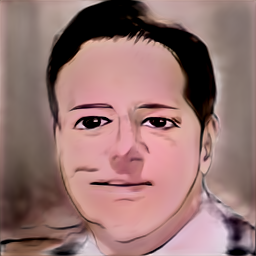

In [ ]:
recon_image = G.synthesis(projected_w.unsqueeze(0), noise_mode='const')
recon_image = (recon_image + 1) * (255/2)
recon_image = recon_image.permute(0, 2, 3, 1).clamp(0, 255).to(torch.uint8)[0].cpu().numpy()
PIL.Image.fromarray(recon_image, 'RGB')